# My try

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
print('train info:')
print(train.info())
print('\ntest info:')
print(test.info())

train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None

test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [4]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
def extractTitle(data):
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
    return data
train = extractTitle(train)
test = extractTitle(test)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


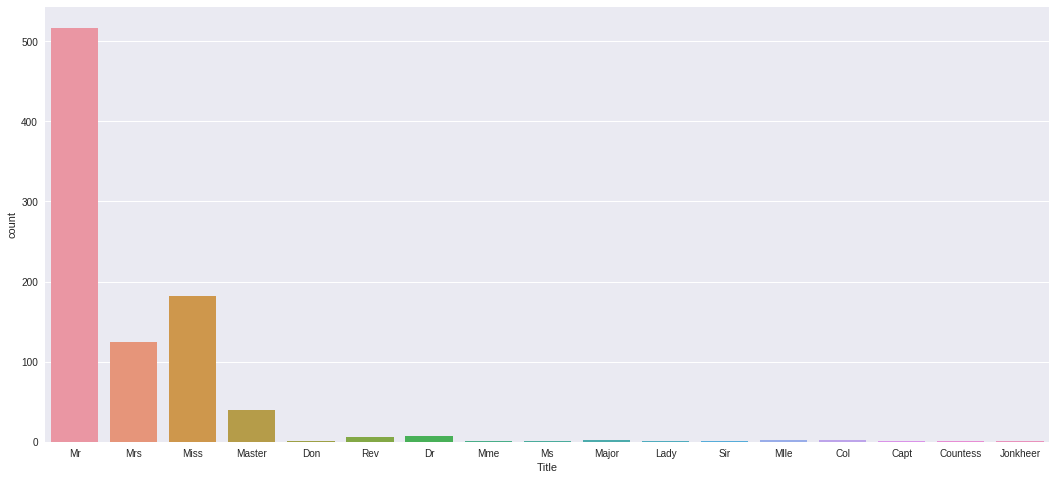

In [7]:
sns.countplot('Title',data=train)
plt.gcf().set_size_inches(18,8)
plt.show()

In [8]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


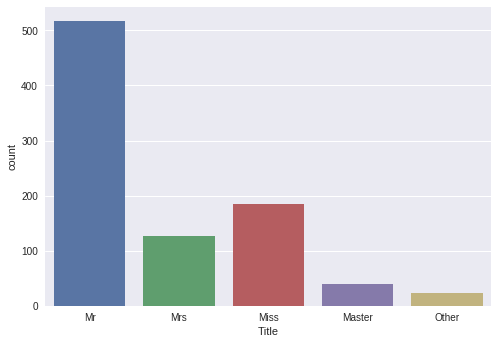

In [9]:
def changeTitle(data):
    data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Other',inplace=True)
    data['Title'].replace(['Mlle','Ms'],'Miss',inplace=True)
    data['Title'].replace('Mme','Mrs',inplace=True)
    return data
train = changeTitle(train)
test = changeTitle(test)
sns.countplot('Title',data=train)
plt.show()

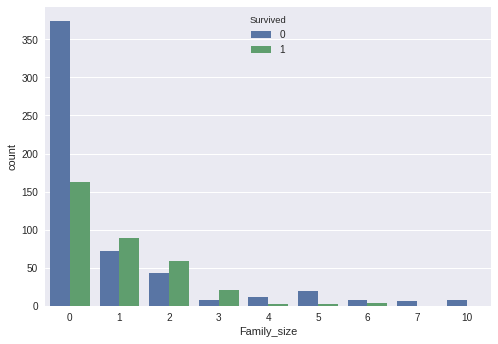

In [10]:
def addFamilySize(data):
    data['Family_size'] = data['SibSp'] + data['Parch']
    return data
train = addFamilySize(train)
test = addFamilySize(test)
sns.countplot('Family_size',hue='Survived',data=train)
plt.show()

In [11]:
def isAlone(data):
    data['Is_Alone'] = 0
    data.loc[data['Family_size']==0,'Is_Alone'] = 1
    return data
test = isAlone(test)
train = isAlone(train)

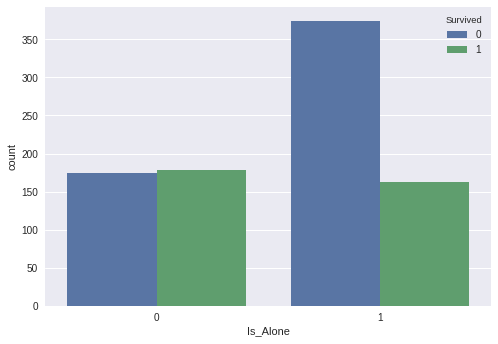

In [12]:
sns.countplot('Is_Alone',hue='Survived',data=train)
plt.show()

In [13]:
def fillNullAge(data):
    mean_age = data.groupby('Title')['Age'].mean()
    data.loc[(data['Age'].isnull()&(data['Title']=='Master')),'Age'] = mean_age[0]
    data.loc[(data['Age'].isnull()&(data['Title']=='Miss')),'Age'] = mean_age[1]    
    data.loc[(data['Age'].isnull()&(data['Title']=='Mr')),'Age'] = mean_age[2]    
    data.loc[(data['Age'].isnull()&(data['Title']=='Mrs')),'Age'] = mean_age[3]    
    data.loc[(data['Age'].isnull()&(data['Title']=='Other')),'Age'] = mean_age[4]
    return data
train = fillNullAge(train)
test = fillNullAge(test)

In [14]:
train.loc[train['Embarked'].isnull(),'Embarked'] = train['Embarked'].value_counts().keys()[0]
test.loc[test['Fare'].isnull(),'Fare']=test['Fare'].median()

In [15]:
def hasCabin(data):
    data['Has_Cabin']=0
    data.loc[data['Cabin'].isnull(),'Has_Cabin']=1
    return data
train = hasCabin(train)
test = hasCabin(test)

In [16]:
def dropData(data):
    data = data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)
    return data
train = dropData(train)
test = dropData(test)

In [17]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,Is_Alone,Has_Cabin
0,0,3,male,22.0,7.2500,S,Mr,1,0,1
1,1,1,female,38.0,71.2833,C,Mrs,1,0,0
2,1,3,female,26.0,7.9250,S,Miss,0,1,1
3,1,1,female,35.0,53.1000,S,Mrs,1,0,0
4,0,3,male,35.0,8.0500,S,Mr,0,1,1


In [18]:
def qcutData(data):
    data['Fare'] = pd.qcut(data['Fare'],5,labels=[0,1,2,3,4])
    data['Age'] = pd.qcut(data['Age'],5,labels=[0,1,2,3,4])
    return data
train = qcutData(train)
test = qcutData(test)

In [19]:
def mapData(data):
    data['Sex'] = data['Sex'].map({'male':1,'female':0})
    data['Title'] = data['Title'].map({'Mr':0,'Miss':1,'Mrs':2,'Mster':3,'Other':4})
    data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2})
    return data
train = mapData(train)
test = mapData(test)

In [20]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,Is_Alone,Has_Cabin
0,0,3,1,1,0,0,0.0,1,0,1
1,1,1,0,3,4,1,2.0,1,0,0
2,1,3,0,1,1,0,1.0,0,1,1
3,1,1,0,3,4,0,2.0,1,0,0
4,0,3,1,3,1,0,0.0,0,1,1


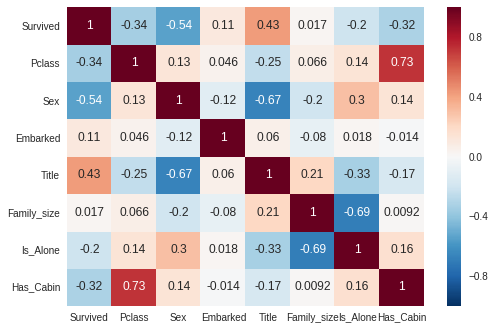

In [24]:
sns.heatmap(train.corr(),annot=True)
plt.show()

# Training